# Findings

- Only 210 out of 1152 (~18%) jobs provided salary information. Out of the postings provided salary info, the salary ranges from HKD$40 (likely a typo from the job poster) to $800,000 per month

# Discussion

- Salary transparency is not very good

In [242]:
import pandas as pd
import re
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from pathlib import Path

In [243]:
# Define constants
INPUT_PATH = "./jobs/"
OUTPUT_PATH = "./transformed/"

In [244]:
# Set the max no. of rows displayed to unlimited (useful when looking at the full dataframe)
pd.set_option('display.max_rows', None)

# Set the display format of numbers in Pandas to 2 dec. places instead of having them displayed in scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display matplotlib figures inline in Juypter Notebook
%matplotlib inline
# figure(figsize=(8, 6), dpi=80)
# Set the default figure size to 8 inches x 6 inches
plt.rcParams["figure.figsize"] = (8, 6)

In [245]:
# import the csv from the job scraping program

# Change the name of the variable below to the name of file that you want the data analyzed
csv_file = "business-analyst_20240718"
df = pd.read_csv(f"{INPUT_PATH}{csv_file}.csv")

# Data Inspection

In [246]:
df.head()

,Title,Company,Min. Years of Exp. Required,Fresh Grad/Less Exp.,Location,Classification,Salary,Posted Date,Job ID,URL
0,"Group Digital, Business Analyst",Hong Kong Aircraft Engineering Co Ltd,5.00,True,"Airport Area, Islands District",Information & Communication Technology,NaN,2024-07-17 14:00:00,77344899,https://hk.jobsdb.com/job/77344899
1,Business Analyst,Lively Impact Technology Limited,NaN,False,"Science Park, Tai Po District",Information & Communication Technology,"$25,000 - $34,000 per month",2024-07-17 12:00:00,77341887,https://hk.jobsdb.com/job/77341887
2,Business Analyst at ACT Solutions Limited,Jobsdb - SmartHire,1.00,False,Southern District,Information & Communication Technology,NaN,2024-07-17 06:00:00,76987834,https://hk.jobsdb.com/job/76987834
3,IT Business Analyst,FUJIFILM BI,2.00,False,"Ngau Tau Kok, Kwun Tong District",Information & Communication Technology,NaN,2024-07-17 11:00:00,77338381,https://hk.jobsdb.com/job/77338381
4,Assistant Business Analyst / Business Analyst,Hong Kong Life Insurance Limited,3.00,True,"Sheung Wan, Central and Western District",Information & Communication Technology,NaN,2024-07-17 14:00:00,77345435,https://hk.jobsdb.com/job/77345435


In [247]:
# Inspect data types and the count of each column in pandas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Title                        1152 non-null   object 
 1   Company                      1152 non-null   object 
 2   Min. Years of Exp. Required  855 non-null    float64
 3   Fresh Grad/Less Exp.         1152 non-null   bool   
 4   Location                     1152 non-null   object 
 5   Classification               1152 non-null   object 
 6   Salary                       210 non-null    object 
 7   Posted Date                  1152 non-null   object 
 8   Job ID                       1152 non-null   int64  
 9   URL                          1152 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 82.3+ KB


In [248]:
# Inspect the descriptive statistics of data
df.describe(include="all")

,Title,Company,Min. Years of Exp. Required,Fresh Grad/Less Exp.,Location,Classification,Salary,Posted Date,Job ID,URL
count,1152,1152,855.00,1152,1152,1152,210,1152,1152.00,1152
unique,992,588,NaN,2,76,24,119,76,NaN,1152
top,Business Analyst,Jobsdb - SmartHire,NaN,False,Central and Western District,Information & Communication Technology,"$20,000 - $30,000 per month",2024-07-17 07:00:00,NaN,https://hk.jobsdb.com/job/77344899
freq,31,40,NaN,927,90,592,10,87,NaN,1
mean,NaN,NaN,3.38,NaN,NaN,NaN,NaN,NaN,77053718.83,NaN
std,NaN,NaN,1.96,NaN,NaN,NaN,NaN,NaN,488865.53,NaN
min,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,72762416.00,NaN
25%,NaN,NaN,2.00,NaN,NaN,NaN,NaN,NaN,77013797.00,NaN
50%,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,77173526.50,NaN
75%,NaN,NaN,5.00,NaN,NaN,NaN,NaN,NaN,77282383.00,NaN


In [280]:
# Check for missing data

df.isnull().mean()

# df["Salary"].notnull().sum()

# for col in df.columns:
#     percentage_missing = round(np.mean(df[col].isnull()), 2) * 100
#     print("{0} - {1}%".format(col, percentage_missing))

# **some values are missing in the "Min. Years of Exp. Required" and "Salary" columns**

Title                         0.00
Company                       0.00
Min. Years of Exp. Required   0.26
Fresh Grad/Less Exp.          0.00
Location                      0.00
Classification                0.00
Salary                        0.82
Posted Date                   0.00
Job ID                        0.00
URL                           0.00
dtype: float64

In [250]:
df["Min. Years of Exp. Required"].value_counts()

Min. Years of Exp. Required
3.00    193
5.00    183
2.00    168
1.00    160
4.00     56
8.00     47
7.00     23
6.00     21
0.00      3
9.00      1
Name: count, dtype: int64

Most jobs requires at least 3 years of experience, followed by 5, 2, 1, etc.

# Data Cleaning

In [251]:
df_clean = copy.deepcopy(df)

In [252]:
# Convert the dtype of the "Min. Years of Exp. Required" column from float64 to Int64
# the dtype "Int64" allows for null values, while "int64" does not
df_clean["Min. Years of Exp. Required"] = df_clean["Min. Years of Exp. Required"].astype("Int64")

In [253]:
df_clean.head()

,Title,Company,Min. Years of Exp. Required,Fresh Grad/Less Exp.,Location,Classification,Salary,Posted Date,Job ID,URL
0,"Group Digital, Business Analyst",Hong Kong Aircraft Engineering Co Ltd,5,True,"Airport Area, Islands District",Information & Communication Technology,NaN,2024-07-17 14:00:00,77344899,https://hk.jobsdb.com/job/77344899
1,Business Analyst,Lively Impact Technology Limited,<NA>,False,"Science Park, Tai Po District",Information & Communication Technology,"$25,000 - $34,000 per month",2024-07-17 12:00:00,77341887,https://hk.jobsdb.com/job/77341887
2,Business Analyst at ACT Solutions Limited,Jobsdb - SmartHire,1,False,Southern District,Information & Communication Technology,NaN,2024-07-17 06:00:00,76987834,https://hk.jobsdb.com/job/76987834
3,IT Business Analyst,FUJIFILM BI,2,False,"Ngau Tau Kok, Kwun Tong District",Information & Communication Technology,NaN,2024-07-17 11:00:00,77338381,https://hk.jobsdb.com/job/77338381
4,Assistant Business Analyst / Business Analyst,Hong Kong Life Insurance Limited,3,True,"Sheung Wan, Central and Western District",Information & Communication Technology,NaN,2024-07-17 14:00:00,77345435,https://hk.jobsdb.com/job/77345435


In [254]:
# Drop duplicate values if there's any 
# the data should NOT have any duplicates since the scraper
# program should have only included jobs that are unique

# the two JobID before and after dropping duplicates SHOULD match
print(len(df_clean["Job ID"]))
df_clean.drop_duplicates()
print(len(df_clean["Job ID"]))
df_clean.info()

# **and they do match, no duplicates were dropped**

1152
1152
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Title                        1152 non-null   object
 1   Company                      1152 non-null   object
 2   Min. Years of Exp. Required  855 non-null    Int64 
 3   Fresh Grad/Less Exp.         1152 non-null   bool  
 4   Location                     1152 non-null   object
 5   Classification               1152 non-null   object
 6   Salary                       210 non-null    object
 7   Posted Date                  1152 non-null   object
 8   Job ID                       1152 non-null   int64 
 9   URL                          1152 non-null   object
dtypes: Int64(1), bool(1), int64(1), object(7)
memory usage: 83.4+ KB


In [255]:
def identify_area(district):
    area_district_full_dict = {
        "hong kong": ("central and western", "wan chai", "eastern", "southern", "hong kong island"),
        "kowloon": ("yau tsim mong", "sham shui po", "kowloon city", "wong tai sin", "kwun tong"),
        "new territories": ("kwai tsing", "tsuen wan", "tuen mun", "yuen long", "north", "tai po", "sha tin", "sai kung", "islands")
        }
    
    for area, districts in area_district_full_dict.items():

        if district in districts:
            return area.title()
    return None

def clean_location(location):
    full_location = dict.fromkeys(["Exact Location", "District", "Area"], None)

    location_split = [loc.strip() for loc in location.split(",")]
    if len(location_split) > 1:
        district_stripped = location_split[1].split(" District")[0]

        full_location["Exact Location"] = location_split[0]
        full_location["District"] = district_stripped
        full_location["Area"] = identify_area(district_stripped.lower())
        # print(full_location["Area"])
    else:
        areas = ("hong kong", "kowloon", "new territories", "others")
        district_stripped = location.split(" District")[0]

        # if any(area in location.lower() for area in areas):
        if any(area == location.lower() for area in areas):
            full_location["Area"] = location
        else:
            full_location["District"] = district_stripped

        if not full_location["Area"]:
            full_location["Area"] = identify_area(district_stripped.lower())
    return full_location

df_clean[["Exact Location", "District", "Area"]] = df_clean.apply(lambda row: clean_location(row["Location"]), axis="columns", result_type="expand")
df_clean.drop("Location", axis=1, inplace=True)

In [256]:
df_clean.head()

,Title,Company,Min. Years of Exp. Required,Fresh Grad/Less Exp.,Classification,Salary,Posted Date,Job ID,URL,Exact Location,District,Area
0,"Group Digital, Business Analyst",Hong Kong Aircraft Engineering Co Ltd,5,True,Information & Communication Technology,NaN,2024-07-17 14:00:00,77344899,https://hk.jobsdb.com/job/77344899,Airport Area,Islands,New Territories
1,Business Analyst,Lively Impact Technology Limited,<NA>,False,Information & Communication Technology,"$25,000 - $34,000 per month",2024-07-17 12:00:00,77341887,https://hk.jobsdb.com/job/77341887,Science Park,Tai Po,New Territories
2,Business Analyst at ACT Solutions Limited,Jobsdb - SmartHire,1,False,Information & Communication Technology,NaN,2024-07-17 06:00:00,76987834,https://hk.jobsdb.com/job/76987834,None,Southern,Hong Kong
3,IT Business Analyst,FUJIFILM BI,2,False,Information & Communication Technology,NaN,2024-07-17 11:00:00,77338381,https://hk.jobsdb.com/job/77338381,Ngau Tau Kok,Kwun Tong,Kowloon
4,Assistant Business Analyst / Business Analyst,Hong Kong Life Insurance Limited,3,True,Information & Communication Technology,NaN,2024-07-17 14:00:00,77345435,https://hk.jobsdb.com/job/77345435,Sheung Wan,Central and Western,Hong Kong


In [257]:
# print(np.where(pd.isnull(df["Salary"])))
# df["Salary"] = df["Salary"].apply(lambda row: print(row))
def clean_salary(salary):
        salary_min_max = dict.fromkeys(["min", "max"], 0)
        # print(salary_min_max)

        if not pd.isnull(salary) and re.search(r"-|\^d+$", salary):
        # if not pd.isnull(salary) and re.match(r"\d+\w*\s?-\s?\$?\w*\d+|^\d+$", salary):
                # print(salary)
                # Remove digit separators in numbers
                salary_cleaned = salary.replace(",", "")
                # digit_abbr_exists = re.search(r"\d+\s?[kK]", salary_cleaned)
                
                # Remove decimcal places in numbers
                salary_cleaned = re.sub(r"\.(.*?[0]*)", "", salary_cleaned)

                # Replace digit abbr. with actual digits
                salary_cleaned = re.sub(r"(\d+)\s?[Kk]|(\d{1,3})(?!\d+)(?=-)", r"\g<1>\g<2>000", salary_cleaned)
                # salary_cleaned = re.sub(r"(\d{1,3})(?!\d+)(?=-)", r"\g<1>000", salary_cleaned)
                # print(salary_cleaned)
                # if digit_abbr_exists:
                #         digit_abbr_index = digit_abbr_exists.span()
                #         # print(digit_abbr_index, digit_abbr_exists.group)
                        # salary_cleaned = salary_cleaned.lower()[digit_abbr_index[0]:digit_abbr_index[1]+1].replace("k", "000") + salary_cleaned[digit_abbr_index[1]+1:]
                # print(salary, " ---- ",salary_cleaned)

                # # Add missing digit abbr.
                # salary_abbr_missing = re.findall(r"(\d+).?\d*\s*-", salary_cleaned)
                # if salary_abbr_missing:
                #         salary_cleaned

                salaries = re.findall(r"\d+", salary_cleaned)
                salaries = [int(x) for x in salaries]
                # print(salaries, "\n")
                if len(salaries):
                        salary_min_max["max"] = salaries[1]
                        salary_min_max["min"] = salaries[0]
        return salary_min_max


# for col in df["Salary"]:
#     if not pd.isnull(col):
#         # print(col)
#         # print(col.replace(",", ""))
#         min_salary = re.findall(r"\d+,?", col)
# #         print(col)
#         print(min_salary)

df_clean[["Min Salary", "Max Salary"]] = df_clean.apply(lambda row: clean_salary(row["Salary"]), axis="columns", result_type="expand").astype({"max":"int", "min":"int"})
df_clean.drop("Salary", axis=1, inplace=True)

In [258]:
df_clean.head()

,Title,Company,Min. Years of Exp. Required,Fresh Grad/Less Exp.,Classification,Posted Date,Job ID,URL,Exact Location,District,Area,Min Salary,Max Salary
0,"Group Digital, Business Analyst",Hong Kong Aircraft Engineering Co Ltd,5,True,Information & Communication Technology,2024-07-17 14:00:00,77344899,https://hk.jobsdb.com/job/77344899,Airport Area,Islands,New Territories,0,0
1,Business Analyst,Lively Impact Technology Limited,<NA>,False,Information & Communication Technology,2024-07-17 12:00:00,77341887,https://hk.jobsdb.com/job/77341887,Science Park,Tai Po,New Territories,25000,34000
2,Business Analyst at ACT Solutions Limited,Jobsdb - SmartHire,1,False,Information & Communication Technology,2024-07-17 06:00:00,76987834,https://hk.jobsdb.com/job/76987834,None,Southern,Hong Kong,0,0
3,IT Business Analyst,FUJIFILM BI,2,False,Information & Communication Technology,2024-07-17 11:00:00,77338381,https://hk.jobsdb.com/job/77338381,Ngau Tau Kok,Kwun Tong,Kowloon,0,0
4,Assistant Business Analyst / Business Analyst,Hong Kong Life Insurance Limited,3,True,Information & Communication Technology,2024-07-17 14:00:00,77345435,https://hk.jobsdb.com/job/77345435,Sheung Wan,Central and Western,Hong Kong,0,0


In [259]:
# df_clean[df_clean["Min. Years of Exp. Required"]<=1].value_counts()
df_clean[["Min. Years of Exp. Required", "District"]][df_clean["Min. Years of Exp. Required"]==1].value_counts()

Min. Years of Exp. Required  District           
1                            Central and Western    27
                             Kwun Tong              26
                             Eastern                17
                             Wan Chai               14
                             Yau Tsim Mong          14
                             Sham Shui Po            9
                             Kowloon City            8
                             Kwai Tsing              8
                             Hong Kong Island        5
                             Sha Tin                 5
                             Southern                5
                             Islands                 2
                             Tsuen Wan               2
                             Wong Tai Sin            2
                             Sai Kung                1
                             Tai Po                  1
Name: count, dtype: int64

In [260]:
min_yoe_vs_min_salary = df_clean[["Min. Years of Exp. Required", "Min Salary"]]

min_yoe_vs_min_salary[df_clean["Min. Years of Exp. Required"]<=1&~(df_clean["Min Salary"]==0)].groupby("Min. Years of Exp. Required").describe()

Min Salary                                      \
                                 count     mean      std      min      25%   
Min. Years of Exp. Required                                                  
0                                 3.00     0.00     0.00     0.00     0.00   
1                                24.00 32333.29 16765.96 15000.00 20000.00   

                                                        
                                 50%      75%      max  
Min. Years of Exp. Required                             
0                               0.00     0.00     0.00  
1                           25000.00 42500.00 79999.00

# Exploratory Data Analysis

- Min. Years of Exp. Required vs. Min_Salary (py)
- Company vs. Min. Years of Exp. Required vs. Min_Salary
- Location vs. Min_Salary
- Classification vs. Min_Salary (tableau)
- Classification Distribution (tableau)

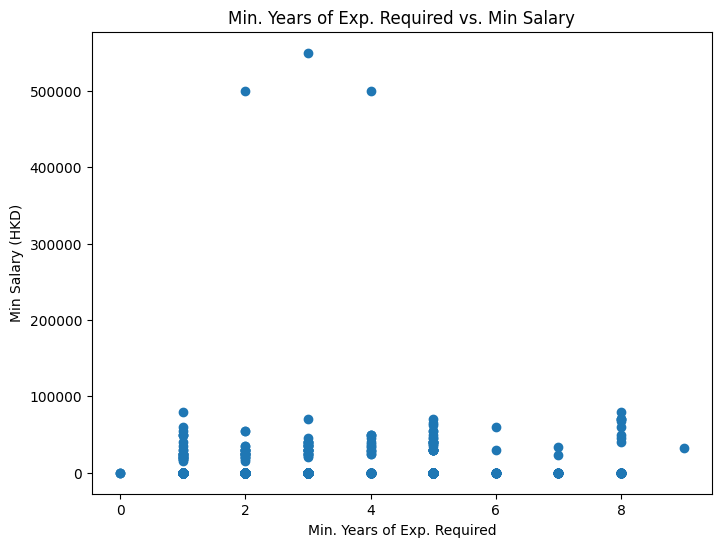

In [261]:
plt.scatter(x=df_clean["Min. Years of Exp. Required"], y=df_clean["Min Salary"])
plt.title("Min. Years of Exp. Required vs. Min Salary")
plt.xlabel("Min. Years of Exp. Required")
plt.ylabel("Min Salary (HKD)")
plt.show()

<Axes: xlabel='Min. Years of Exp. Required', ylabel='Min Salary'>

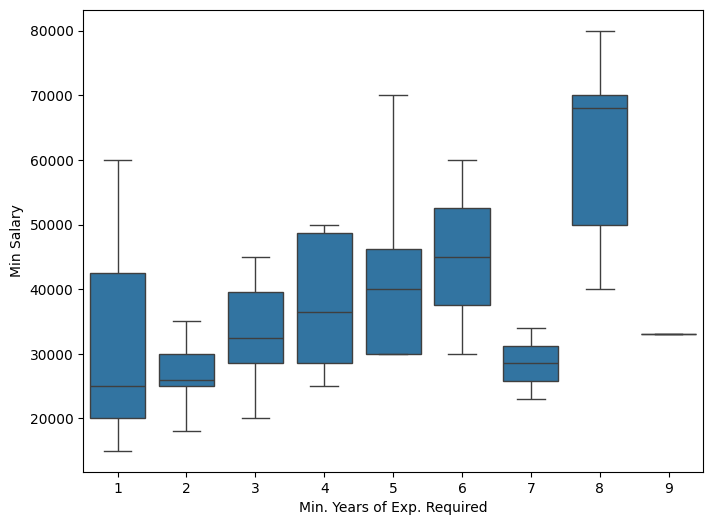

In [262]:
df_yoe_min_salary = df_clean[["Min. Years of Exp. Required", "Min Salary"]]
df_yoe_min_salary_no_nan = df_yoe_min_salary[~(df_yoe_min_salary["Min Salary"]==0)].dropna()

sns.boxplot(x=df_yoe_min_salary_no_nan["Min. Years of Exp. Required"], y=df_yoe_min_salary_no_nan["Min Salary"], showfliers=False)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

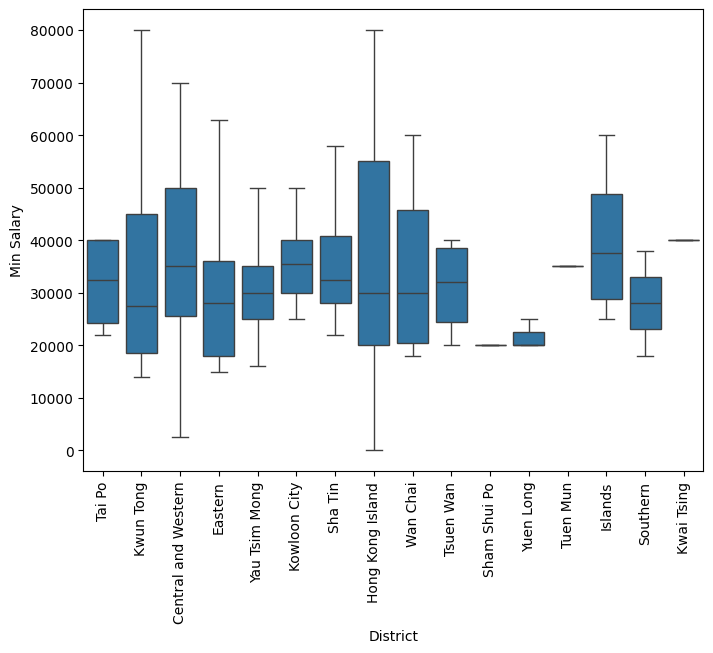

In [263]:
df_district_min_salary = df_clean[["District", "Min Salary"]]
df_district_min_salary_no_nan = df_district_min_salary[~(df_district_min_salary["Min Salary"]==0)].dropna()

district_vs_min_salary = sns.boxplot(x=df_district_min_salary_no_nan["District"], y=df_district_min_salary_no_nan["Min Salary"], showfliers=False)
plt.setp(district_vs_min_salary.get_xticklabels(), rotation=90)

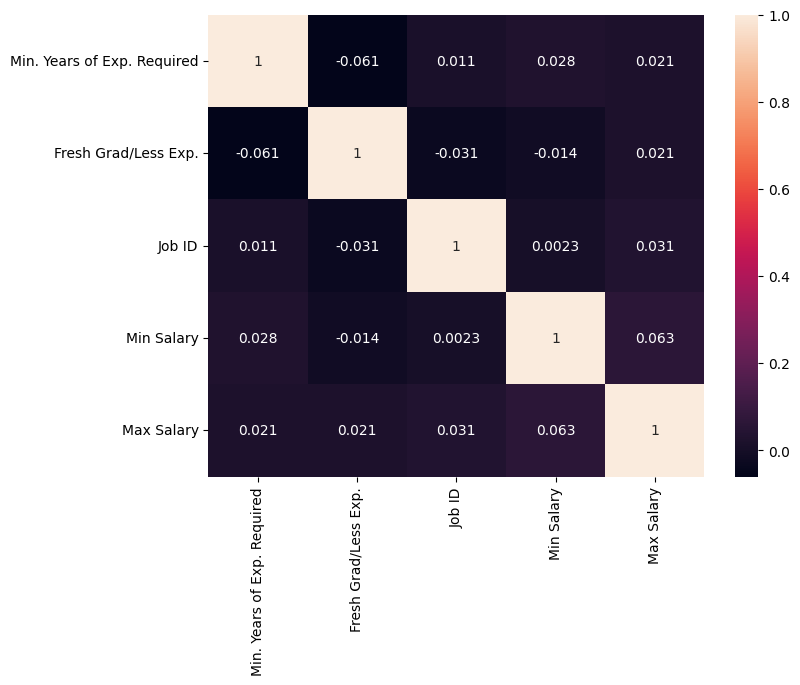

In [264]:
corr_matrix = df_clean.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [265]:
df_numerized = copy.deepcopy(df_clean)

for col in df_numerized.columns:
    if(df_numerized[col].dtype == "object"):
        df_numerized[col] = df_numerized[col].astype("category")
        df_numerized[col] = df_numerized[col].cat.codes

df_numerized.head()

,Title,Company,Min. Years of Exp. Required,Fresh Grad/Less Exp.,Classification,Posted Date,Job ID,URL,Exact Location,District,Area,Min Salary,Max Salary
0,457,257,5,True,14,64,77344899,1073,2,3,2,0,0
1,213,327,<NA>,False,14,62,77341887,1064,35,11,2,25000,34000
2,276,298,1,False,14,56,76987834,252,-1,10,0,0,0
3,477,190,2,False,14,61,77338381,1051,28,6,1,0,0
4,91,266,3,True,14,64,77345435,1077,39,0,0,0,0


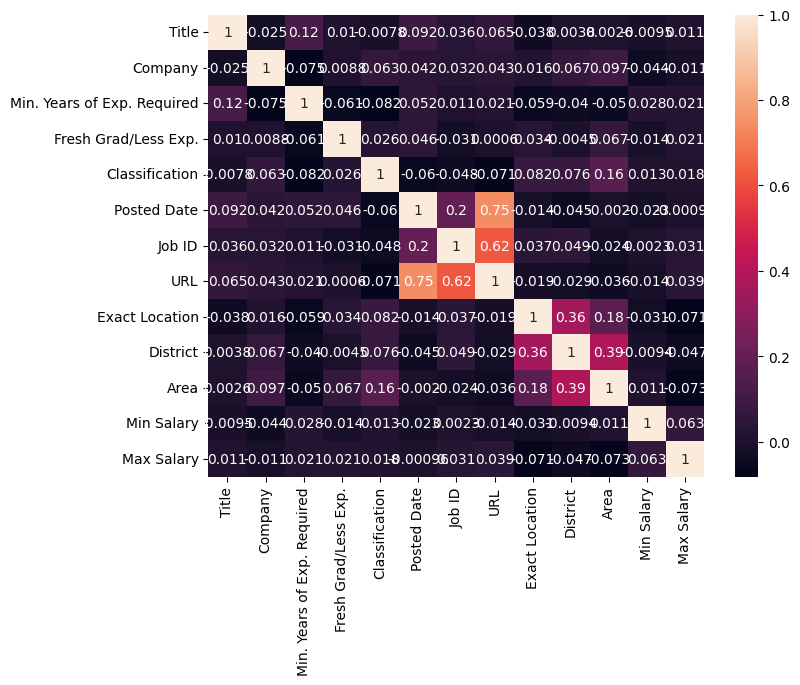

In [266]:
numerized_corr_matrix = df_numerized.corr(numeric_only=True)
sns.heatmap(numerized_corr_matrix, annot=True)
plt.show()

In [267]:
# (Optional) Export the cleansed data to a csv
# or load the data into a db table
Path(OUTPUT_PATH).mkdir(parents=True, exist_ok=True)
df_clean = df_clean[['Title', 'Company', 'Min. Years of Exp. Required',
       'Fresh Grad/Less Exp.', 'Exact Location', 'District', 'Area', 'Classification', 'Min Salary',
       'Max Salary','Posted Date', 'Job ID',
       'URL']]
df_clean.to_csv(f"{OUTPUT_PATH}{csv_file}_transformed.csv", index=False)
print("saved")

saved


In [284]:
df_clean["Min Salary"][df_clean["Min Salary"]>0].min()
# df_clean["Max Salary"][df_clean["Max Salary"]>0].max()

40

# Limitations

- Data might be outdated.